<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import glob
from math import log10, sqrt

# PSNR

Nilai MSE adalah 106.73663894489248
Nilai PSNR adalah  27.847668377860316 (dB)


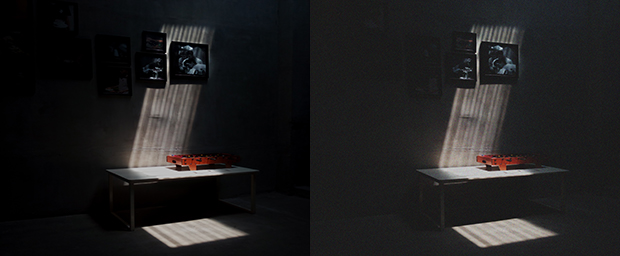

In [30]:
original = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')
# original = cv.resize(original, (0,0), fx = 0.2, fy = 0.2)

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK/UTS/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

dst = cv_img[0]
noise_number = 5

for i in range(noise_number):
    if i == 0 :
      pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original-compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20* log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)
mse = np.mean((original - compressed) ** 2)

print('Nilai MSE adalah', mse)
print('Nilai PSNR adalah ', psnr, '(dB)')
noice_frame = cv.hconcat((original, dst))
cv2_imshow(noice_frame)

Nilai MSE adalah 107.3133316532258
Nilai PSNR adalah  27.82426682669199 (dB)


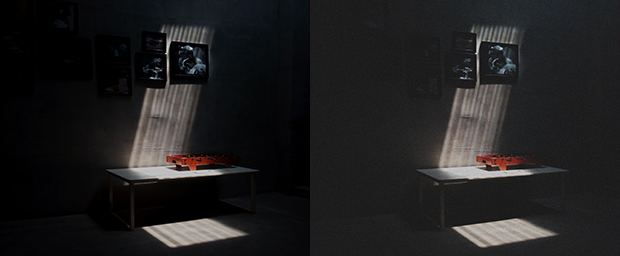

In [34]:
dst = cv_img[0]
noise_number = 10

for i in range(noise_number):
    if i == 0 :
      pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original-compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20* log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)
mse = np.mean((original - compressed) ** 2)

print('Nilai MSE adalah', mse)
print('Nilai PSNR adalah ', psnr, '(dB)')
noice_frame = cv.hconcat((original, dst))
cv2_imshow(noice_frame)

Nilai MSE adalah 104.4517809139785
Nilai PSNR adalah  27.941645117213298 (dB)


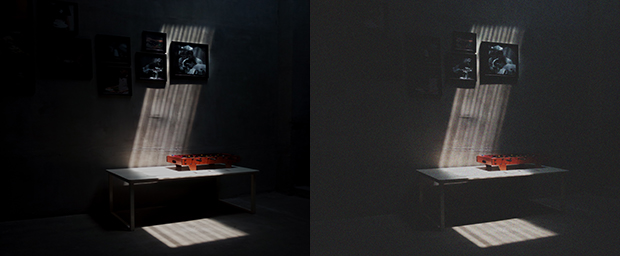

In [35]:
dst = cv_img[0]
noise_number = 15

for i in range(noise_number):
    if i == 0 :
      pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original-compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20* log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)
mse = np.mean((original - compressed) ** 2)

print('Nilai MSE adalah', mse)
print('Nilai PSNR adalah ', psnr, '(dB)')
noice_frame = cv.hconcat((original, dst))
cv2_imshow(noice_frame)

Nilai MSE adalah 104.49591313844086
Nilai PSNR adalah  27.939810554555876 (dB)


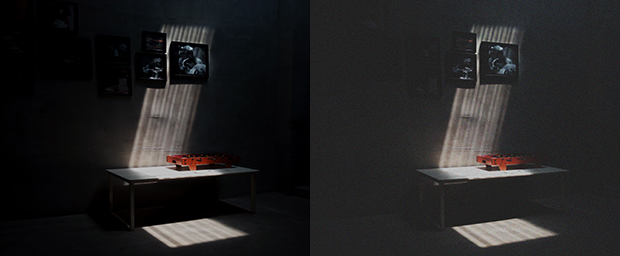

In [36]:
dst = cv_img[0]
noise_number = 20

for i in range(noise_number):
    if i == 0 :
      pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original-compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20* log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)
mse = np.mean((original - compressed) ** 2)

print('Nilai MSE adalah', mse)
print('Nilai PSNR adalah ', psnr, '(dB)')
noice_frame = cv.hconcat((original, dst))
cv2_imshow(noice_frame)

# Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


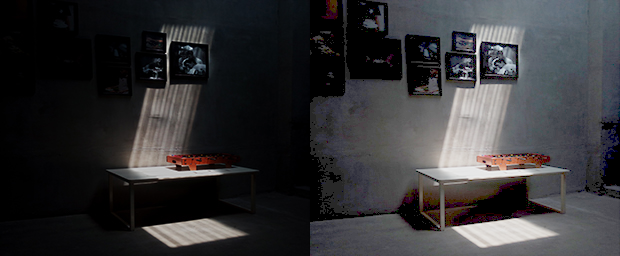

In [28]:
img_gamma = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')
gamma_img = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ') 
print('----------------------------------') 
try: 
 gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
 print('Error, not a number') 

gamma_rgb = cv.cvtColor(gamma_img, cv.COLOR_BGR2RGB)

gamma_image = np.zeros(gamma_rgb.shape, gamma_rgb.dtype)
for y in range(gamma_rgb.shape[0]):
  for x in range(gamma_rgb.shape[1]):
    for c in range(gamma_rgb.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(gamma_rgb[y,x,c]/ 255, (1/gamma)), 0 , 255)

final_frame = cv.hconcat((gamma_rgb, gamma_image))
cv2_imshow(final_frame)


# Merubah Warna Menjadi Red dan Blue

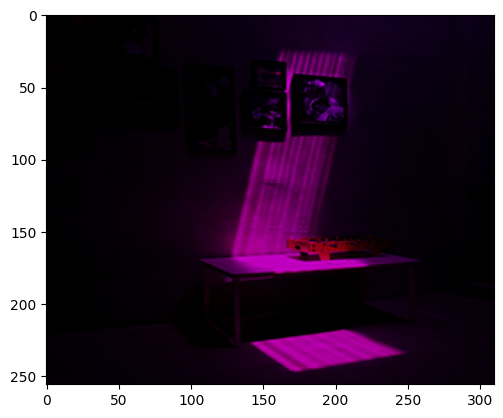

In [41]:
img0 = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')
img1 = cv.cvtColor(img0,cv.COLOR_BGR2RGB)
R,G,B = cv.split(img1)

zeros = np.zeros(img1.shape[:2], dtype="uint8")
rb = cv.merge([R,zeros,B])
plt.imshow(rb)

# Brightness

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


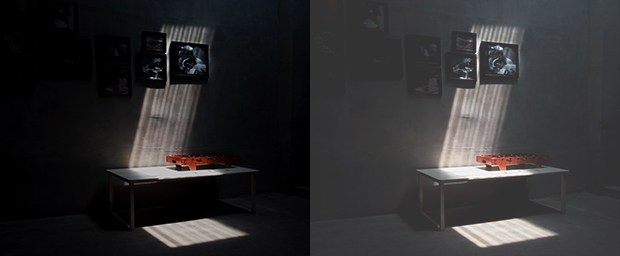

In [42]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

img_gamma1 = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')
brightness_image = np.zeros(img_gamma1.shape, img_gamma1.dtype)

for y in range(img_gamma1.shape[0]):
  for x in range(img_gamma1.shape[1]):
    for c in range(img_gamma1.shape[2]):
      brightness_image[y,x,c] = np.clip(img_gamma1[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((img_gamma1, brightness_image))
cv2_imshow(final_frame)

# Konvolusi

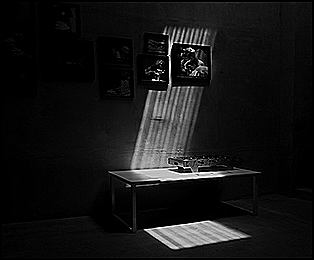

In [43]:
def convolution2d(image , kernel, stride, padding):
  image = np.pad(image, padding, mode = 'constant', constant_values=0)
  
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height,
                                     x * stride:x * stride + kernel_width]*kernel).astype(np.float32)
  return new_image

img_gamma2 = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')
img_gray = cv.cvtColor(img_gamma2, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,3))

# Histogram

<BarContainer object of 256 artists>

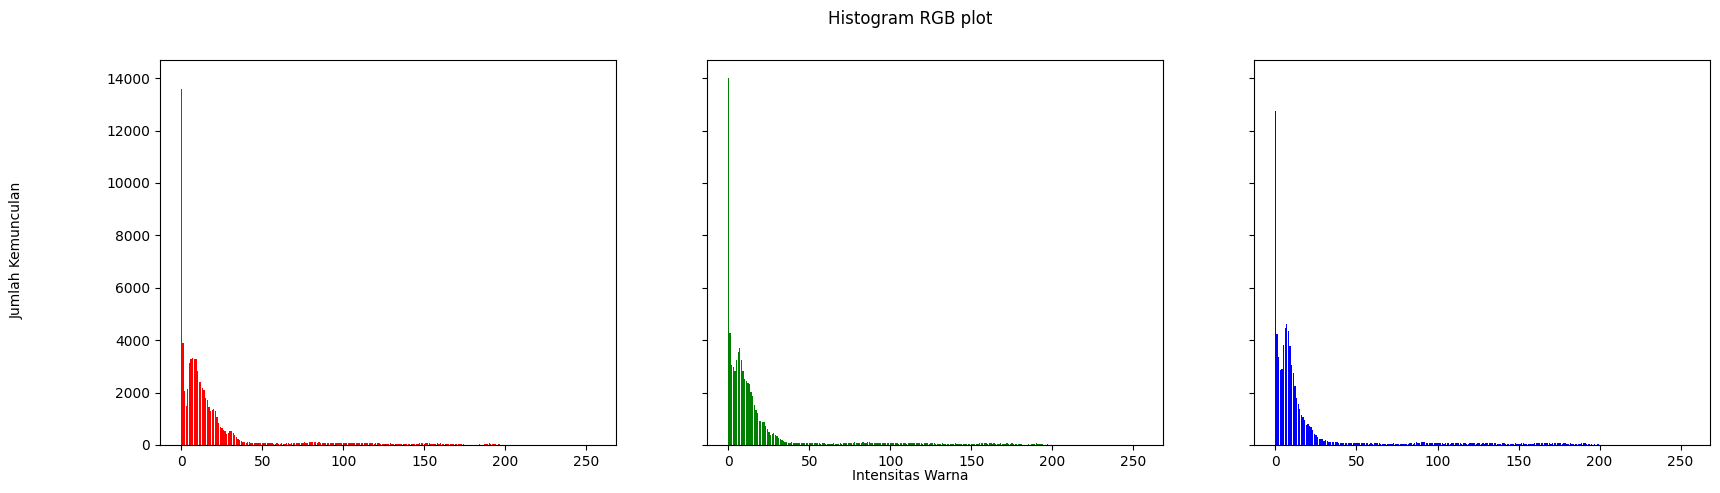

In [44]:
img_gamma3 = cv.imread('/content/drive/MyDrive/PCVK/UTS/Noice.jpg')

height, width, depth = np.shape(img_gamma3)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    red[img_gamma3[y][x][0]] += 1
    green[img_gamma3[y][x][1]] += 1
    blue[img_gamma3[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')